In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
# Dataset for this task can be found on: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
# Importing the dataset into a pandas dataframe
df = pd.read_csv("~/Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Sampling
print(df.shape)
data = df.sample(frac = 0.2,random_state=1)
print(data.shape)

(284807, 31)
(56961, 31)


In [5]:
# Checking for NULL values
df.isnull().values.any()

False

(492, 31) (284315, 31)


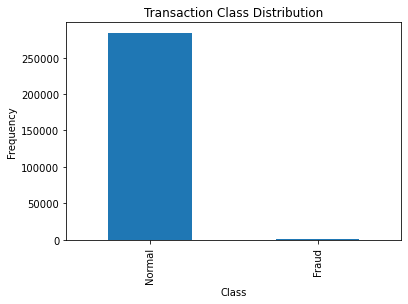

In [6]:
# Separating normal and fraudulent transactions 
num_classes = pd.value_counts(df['Class'], sort = True)
num_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
print(fraud.shape, normal.shape)

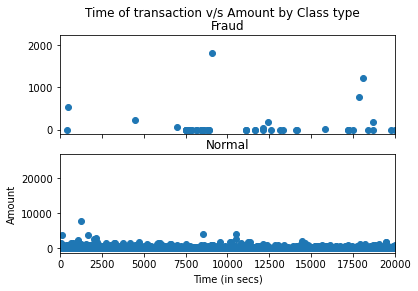

In [7]:
# Let us see, if we can find something observations that enable us to visibly differentiate between normal and fraudulent transactions.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction v/s Amount by Class type')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in secs)')
plt.ylabel('Amount')
plt.xlim((0, 20000))
plt.show()

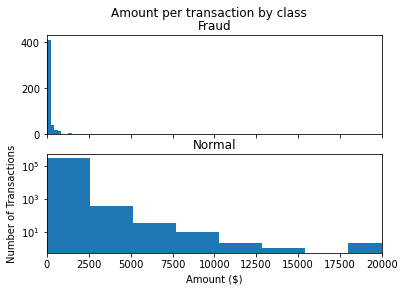

In [8]:
# Log Scale
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 10
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

In [ ]:
# From the first plot, we can observe that fraudulent transactions occur at the same time as normal transaction, making time an irrelevant factor. 
# From the second plot, we can see that most of the fraudulent transactions are small amount transactions. 
# This is however not a huge differentiating feature since majority of normal transactions are also small amount transactions.

In [16]:
# Before proceeding further, let us have a look at how many fraudulent and non-fraudulent transactions 
# Do we have in the reduced dataset (20% of the features) that we’ll use for training the machine learning model to identify anomalies

In [9]:
# Anomaly Fraction
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
anomaly_fraction = len(fraud)/float(len(normal))
print(anomaly_fraction)
print("Fraud Cases: " + str(len(fraud)))
print("Normal Cases: " + str(len(normal)))

0.0015296972254457222
Fraud Cases: 87
Normal Cases: 56874


In [ ]:
# We have just 0.1% fraudulent transactions in the dataset. 
# This means that a random guess by the model should yield 0.1% accuracy for fraudulent transactions. 

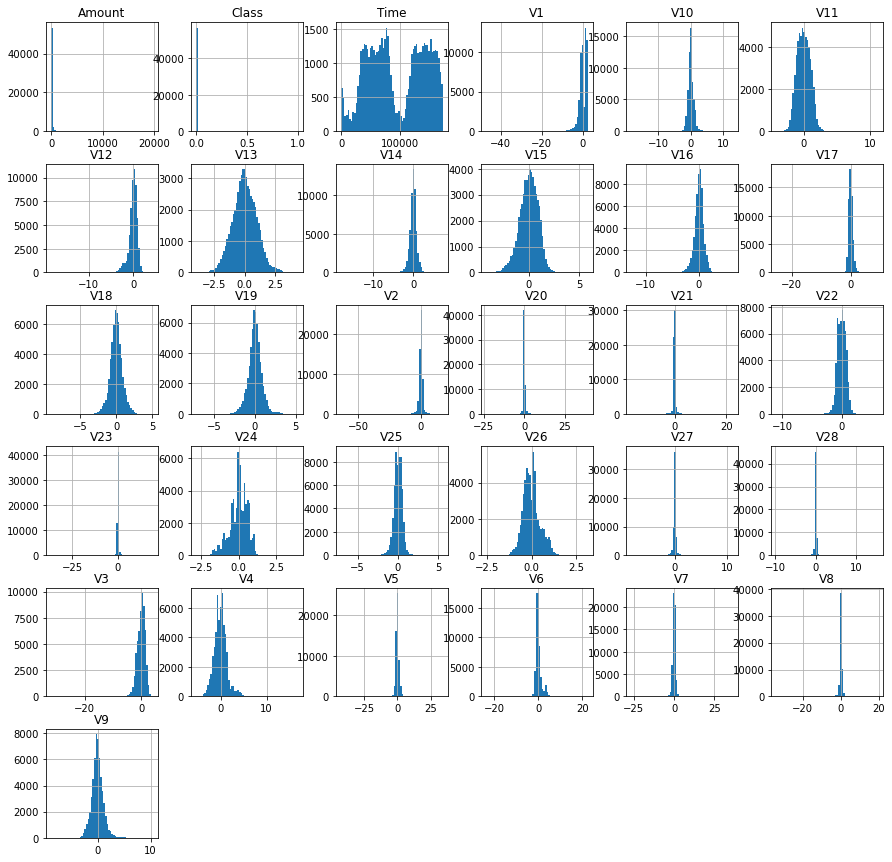

In [10]:
# We learnt that each feature should be normally distributed in order to apply the unsupervised anomaly detection algorithm. 
# Let us plot histograms for each feature and see which features don’t represent Gaussian distribution at all.
data.hist(figsize=(15,15), bins = 64)
plt.show()

In [ ]:
# From the above histograms, we can see that ‘Time’, ‘V1’ and ‘V24’ are the ones that don’t even approximate a Gaussian distribution. 
# Let’s drop these features from the model training process. 
# We were going to omit the ‘Time’ feature anyways.

In [11]:
columns = data.columns.tolist()
target=columns[-1]
columns = columns[:-1]
X_train = data.iloc[:45000, :-1]
y_train = data.iloc[:45000, -1]
X_test = data.iloc[45000:, :-1]
y_test = data.iloc[45000:, -1]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(45000, 30) (11961, 30)
(45000,) (11961,)


In [12]:
# Let us use the LocalOutlierFactor function from the scikit-learn library in order to use unsupervised learning method
model = LocalOutlierFactor(contamination=anomaly_fraction)
y_train_pred = model.fit_predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
y_test_pred = model.fit_predict(X_test)
y_test_pred[y_test_pred == 1] = 0
y_test_pred[y_test_pred == -1] = 1

In [13]:
# Now that we have trained the model, 
# let us evaluate the model’s performance by having a look at the confusion matrix for the same as we discussed earlier that accuracy is not a good metric to evaluate any anomaly detection algorithm, 
# especially the one which has such a skewed input data as this one

import itertools
classes = np.array(['0','1'])
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

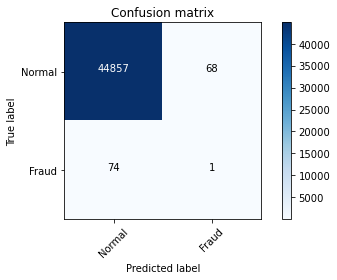

In [14]:
# The above function is a helper function that enables us to construct a confusion matrix
# Training confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train,["Normal", "Fraud"])

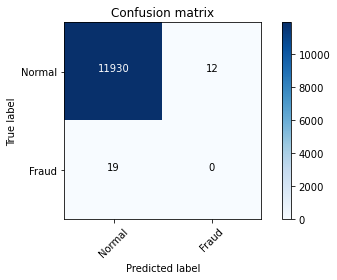

In [15]:
# Testing confusion_matrix 
cm_test = confusion_matrix(y_test_pred, y_test)
plot_confusion_matrix(cm_test,["Normal", "Fraud"])

In [ ]:
# We can see that out of the 75 fraudulent transactions in the training set, 
# only 1 have been captured correctly whereas 74 are misclassified, which is a problem.

In [ ]:
# When we compare this performance to the random guess probability of 0.1%, 
# it is a significant improvement form that but not convincing enough.

In [ ]:
# Even in the test set, we see that 11,936/11,942 normal transactions are correctly predicted, 
# but only 6/19 fraudulent transactions are correctly captured.

In [16]:
# Analyzing the performance 
print('Total fraudulent transactions detected in training set: ' + str(cm_train[1][1]) + ' / ' + str(cm_train[1][1]+cm_train[1][0]))
print('Total non-fraudulent transactions detected in training set: ' + str(cm_train[0][0]) + ' / ' + str(cm_train[0][1]+cm_train[0][0]))
print('Probability to detect a fraudulent transaction in the training set: ' + str(cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])))
print('Probability to detect a non-fraudulent transaction in the training set: ' + str(cm_train[0][0]/(cm_train[0][1]+cm_train[0][0])))
print("Accuracy of unsupervised anomaly detection model on the training set: "+str(100*(cm_train[0][0]+cm_train[1][1]) / (sum(cm_train[0]) + sum(cm_train[1]))) + "%")

print('Total fraudulent transactions detected in test set: ' + str(cm_test[1][1]) + ' / ' + str(cm_test[1][1]+cm_test[1][0]))
print('Total non-fraudulent transactions detected in test set: ' + str(cm_test[0][0]) + ' / ' + str(cm_test[0][1]+cm_test[0][0]))
print('Probability to detect a fraudulent transaction in the test set: ' + str(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])))
print('Probability to detect a non-fraudulent transaction in the test set: ' + str(cm_test[0][0]/(cm_test[0][1]+cm_test[0][0])))
print("Accuracy of unsupervised anomaly detection model on the test set: "+str(100*(cm_test[0][0]+cm_test[1][1]) / (sum(cm_test[0]) + sum(cm_test[1]))) + "%")

Total fraudulent transactions detected in training set: 1 / 75
Total non-fraudulent transactions detected in training set: 44857 / 44925
Probability to detect a fraudulent transaction in the training set: 0.013333333333333334
Probability to detect a non-fraudulent transaction in the training set: 0.998486366165832
Accuracy of unsupervised anomaly detection model on the training set: 99.68444444444444%
Total fraudulent transactions detected in test set: 0 / 19
Total non-fraudulent transactions detected in test set: 11930 / 11942
Probability to detect a fraudulent transaction in the test set: 0.0
Probability to detect a non-fraudulent transaction in the test set: 0.9989951431920951
Accuracy of unsupervised anomaly detection model on the test set: 99.74082434579049%
